# Welcome to Telco Customer Churn's notebook for exploratory data analysis
To run all the code, you can use the "run all" function. You can also follow along and run the code accordingly. Note that we assume this project to be running with ***Jupyter Notebook***.

## 1. Dependencies
We have recorded all the required dependencies in `requirements.txt`, to get all the dependencies installed, simply run the below's code.

In [176]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## 2. Project setup
Below cell imports all the library needed and do some global setting for the dataframes.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000
pd.options.display.max_colwidth = 100

data_root = 'dataset'
dataset_name = "churn_data_clean_no_rebalance.csv"

## 3. Reading in data
We proceed to perform exploratory data analysis (EDA) with cleaned data that is not rebalanced, which is saved in `churn_data_clean_no_rebalance.csv`.

In [2]:

data_path = os.path.join(data_root, dataset_name)
df = pd.read_csv(data_path)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


## 4. Data Preprocessing
This section begins the steps for data preprocessing, including some exploratory data analysis and some data cleaning.

### 4.1. Data Cleaning and Preparations
We start by doing some preliminary exploration of our data to gain some insight of it.

Let's first start by having alook at some information of the columns:

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the output, we can see that there is no null value for all the columns, but just to be safe, we also have a look at unique values for each columns:

In [180]:
for column in df.columns:
    print(column, df[column].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

From the output above, it it clear that there is really no missing values. However, there is a few problems:
1. customerID is not a useful column to perform any operation for
2. TotalCharges have wrong representation for value, it should be numerical instead
3. SeniorCitizen should be object instead of int64
4. According to the [new data description](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113), values such as 'No internet service' and 'No phone service' has been morphed to 'No'.

Let's address these problems.

First, we make a copy of the `df`

In [181]:
# make a copy for df
df_cleaned = df.copy()

We can remove `customerID` from the `df`

In [182]:
# remove customerID
df_cleaned.drop(columns=['customerID'], inplace=True)

Next, we convert `TotalCharge` to numerical datatype.

In [183]:
# convert TotalCharge to numerical
df_cleaned['TotalCharges'] = pd.to_numeric(df_cleaned['TotalCharges'], errors='coerce')

In [184]:
# check for nan
df_cleaned.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

With some literature review, Loukili, Messaoudi, and El Youbi (2023), have discovered that `TotalCharges` can be calculated by multiplying the two variables `tenure` and `MonthlyCharges`. For all null `TotalCharges` column, the corresponding `tenure` value is 0, indicating that it is their first month, hence its more reasonable to assign the `MonthlyCharges` value to all the missing values.

In [185]:
# if TotalCharges is nan, replace it with MonthlyCharges
df_cleaned['TotalCharges'].fillna(df_cleaned['MonthlyCharges'], inplace=True)

df_cleaned.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Following that, we map `SeniorCitizen` to "No" and "Yes" to standarize the representation. which make it easier for data exploration and further processing.

In [186]:
# map SeniorCitizen to "No" and "Yes"
df_cleaned['SeniorCitizen'] = df_cleaned['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

Lastly, we morph the redundant value of some columns into 'No'.

In [187]:
df_cleaned['MultipleLines'] = df_cleaned['MultipleLines'].replace('No phone service','No')
df_cleaned['OnlineSecurity'] = df_cleaned['OnlineSecurity'].replace('No internet service','No')
df_cleaned['OnlineBackup'] = df_cleaned['OnlineBackup'].replace('No internet service','No')
df_cleaned['DeviceProtection'] = df_cleaned['DeviceProtection'].replace('No internet service','No')
df_cleaned['TechSupport'] = df_cleaned['TechSupport'].replace('No internet service','No')
df_cleaned['StreamingTV'] = df_cleaned['StreamingTV'].replace('No internet service','No')
df_cleaned['StreamingMovies'] = df_cleaned['StreamingMovies'].replace('No internet service','No')

We can check the values again:

In [188]:
for column in df_cleaned.columns:
    print(column, df_cleaned[column].unique())

gender ['Female' 'Male']
SeniorCitizen ['No' 'Yes']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn ['No' 'Yes']


In [189]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [190]:
df_cleaned.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 4.2. Binary values mapping

We will also map binary categorical values in to 0 and 1 which will make future access more convenient.

In [192]:
df_cleaned["gender"] = df_cleaned["gender"].replace({"Female": 0, "Male": 1})
df_cleaned["SeniorCitizen"] = df_cleaned["SeniorCitizen"].replace({"No": 0, "Yes": 1})
df_cleaned["Partner"] = df_cleaned["Partner"].replace({"No": 0, "Yes": 1})
df_cleaned["Dependents"] = df_cleaned["Dependents"].replace({"No": 0, "Yes": 1})
df_cleaned["PhoneService"] = df_cleaned["PhoneService"].replace({"No": 0, "Yes": 1})
df_cleaned["MultipleLines"] = df_cleaned["MultipleLines"].replace({"No": 0, "Yes": 1})
df_cleaned["OnlineSecurity"] = df_cleaned["OnlineSecurity"].replace({"No": 0, "Yes": 1})
df_cleaned["OnlineBackup"] = df_cleaned["OnlineBackup"].replace({"No": 0, "Yes": 1})
df_cleaned["DeviceProtection"] = df_cleaned["DeviceProtection"].replace({"No": 0, "Yes": 1})
df_cleaned["TechSupport"] = df_cleaned["TechSupport"].replace({"No": 0, "Yes": 1})
df_cleaned["StreamingTV"] = df_cleaned["StreamingTV"].replace({"No": 0, "Yes": 1})
df_cleaned["StreamingMovies"] = df_cleaned["StreamingMovies"].replace({"No": 0, "Yes": 1})
df_cleaned["PaperlessBilling"] = df_cleaned["PaperlessBilling"].replace({"No": 0, "Yes": 1})
df_cleaned["Churn"] = df_cleaned["Churn"].replace({"No": 0, "Yes": 1})

Finally, we save this snapshot of dataset before imbalancing to `data_cleaned_no_rebalance.csv`

In [193]:
# save cleaned data
cleaned_data_path = os.path.join(data_root, 'churn_data_clean_no_rebalance.csv')

df_cleaned.to_csv(cleaned_data_path, index=False)

The highest correlation pair is 0.83, between `tenure` and `TotalCharges`, which make sense as higher tenure means higher total charges for each customer.

### 4.3. Imbalance data
For this section, we will be looking into the distribution of category values of `df_cleaned` looking for any data data is overly imbalance, and rebalance them using some oversampling techniques.

Firstly, we look into the distribution of all categorical values:

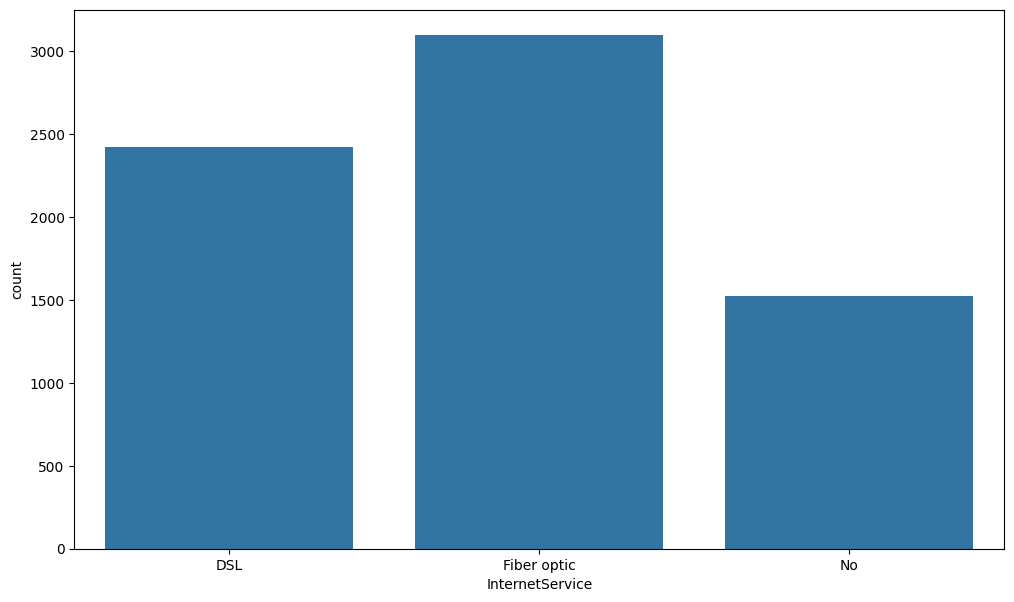

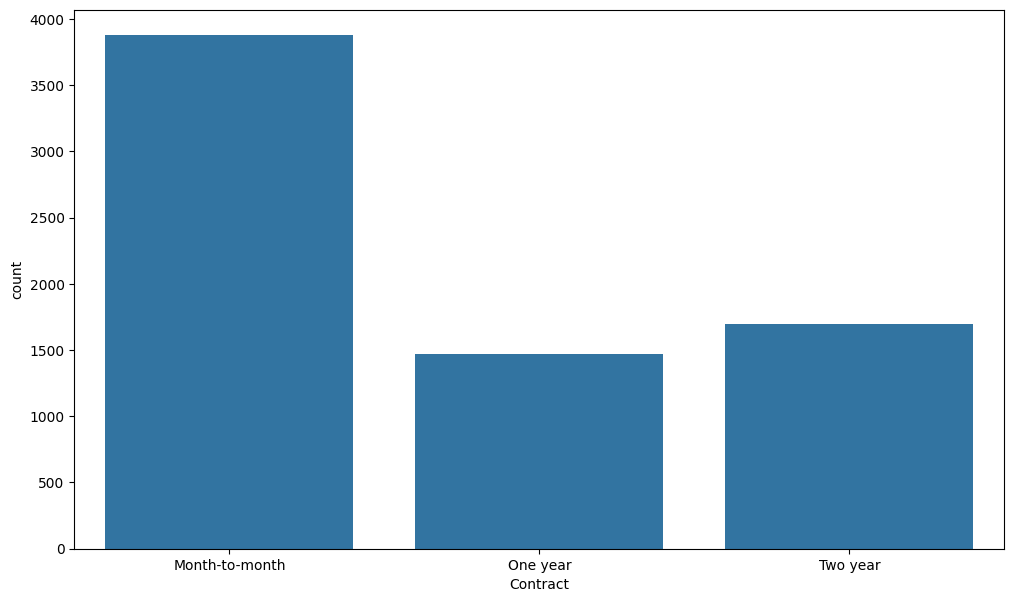

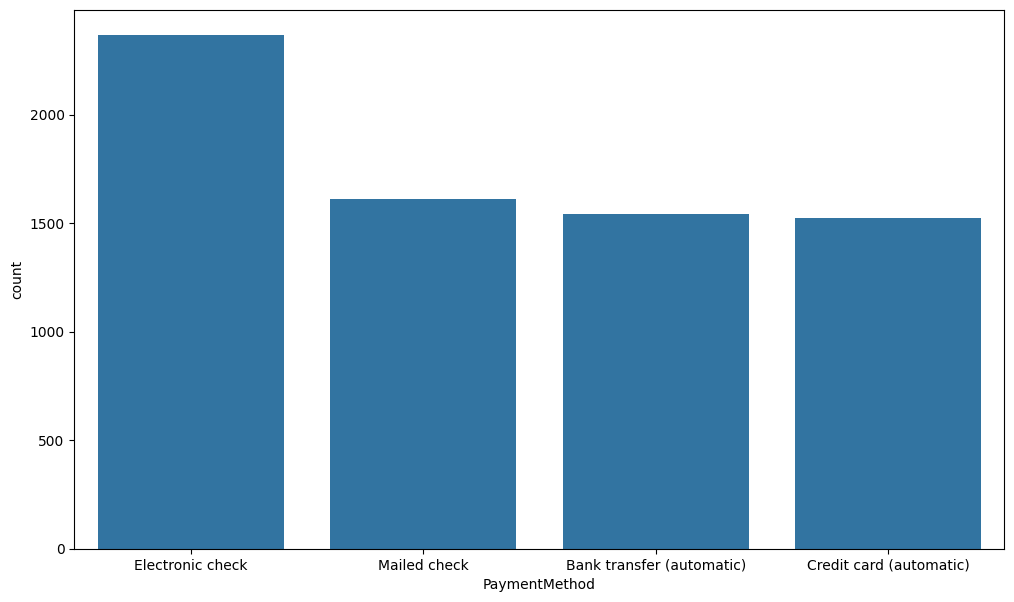

In [196]:
#plot distribution grahps for all categorical variables

non_numeric_columns = df_cleaned.select_dtypes(['object']).columns
for column in non_numeric_columns:
    plt.figure(figsize=(12, 7))
    sns.countplot(x=column, data=df_cleaned)
    plt.show()


From the plots, we can see that both `SeniorCitizen` and `PhoneService` have big differences in their distribution, we can proceed to check their differences in values:

In [197]:
df_cleaned['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [198]:
df_cleaned['PhoneService'].value_counts()

PhoneService
1    6361
0     682
Name: count, dtype: int64

Even though they appear quite different visually, the values are only not as significant (not like 99% against 1%). Additionally, the distribution is also logically in real life scenerio, as they will always be less senior citizen and less are with no phone service. Hence, we do not rebalance the data for these 2 columns.

However, there is a clear imbalance for our target row: `Churn`, we will rebalance the data with `SMOTE` upsampling.

In [199]:
df_cleaned.select_dtypes(['object']).columns

Index(['InternetService', 'Contract', 'PaymentMethod'], dtype='object')

In [200]:
# import smote
import imblearn
from imblearn.over_sampling import SMOTENC


categorical_features_index = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [201]:
# check for nan values
df_cleaned.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [202]:
# use smotenc to oversample
smote_nc = SMOTENC(categorical_features=categorical_features_index, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(df_cleaned.drop(columns=['Churn']), df_cleaned['Churn'])

# convert X_resampled and y_resampled to dataframe
X_resampled = pd.DataFrame(X_resampled, columns=df_cleaned.drop(columns=['Churn']).columns)
y_resampled = pd.DataFrame(y_resampled, columns=['Churn'])

# combine X_resampled and y_resampled
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

df_resampled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


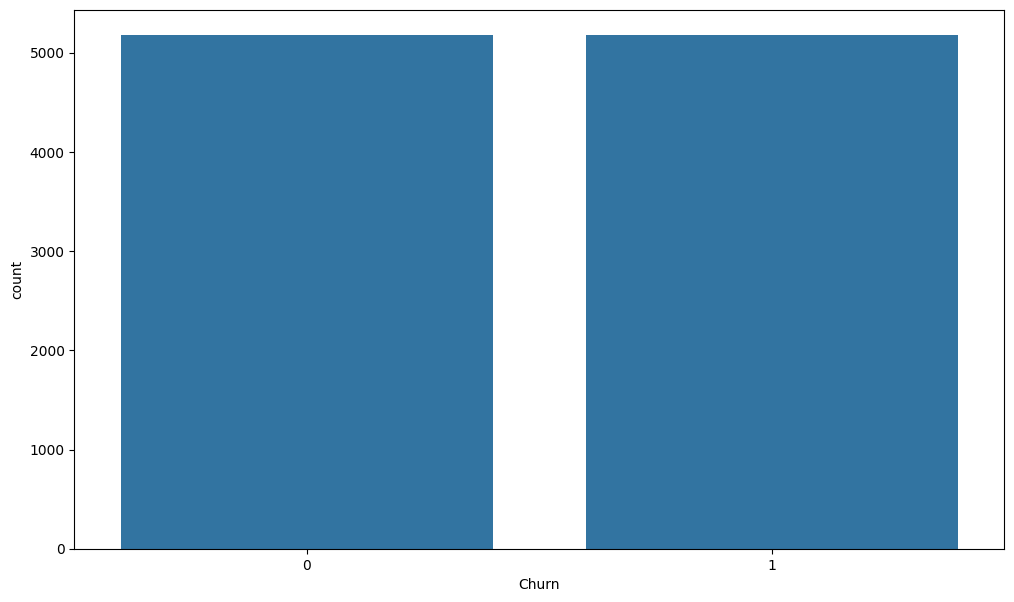

In [203]:
# plot distribution for Churn
plt.figure(figsize=(12, 7))
sns.countplot(x='Churn', data=df_resampled)
plt.show()

In [204]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            10348 non-null  int64  
 1   SeniorCitizen     10348 non-null  int64  
 2   Partner           10348 non-null  int64  
 3   Dependents        10348 non-null  int64  
 4   tenure            10348 non-null  int64  
 5   PhoneService      10348 non-null  int64  
 6   MultipleLines     10348 non-null  int64  
 7   InternetService   10348 non-null  object 
 8   OnlineSecurity    10348 non-null  int64  
 9   OnlineBackup      10348 non-null  int64  
 10  DeviceProtection  10348 non-null  int64  
 11  TechSupport       10348 non-null  int64  
 12  StreamingTV       10348 non-null  int64  
 13  StreamingMovies   10348 non-null  int64  
 14  Contract          10348 non-null  object 
 15  PaperlessBilling  10348 non-null  int64  
 16  PaymentMethod     10348 non-null  object

In [205]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


The upsampling created around 3000 entries to the dataset. Next we perform one hot encoding and save the rebalanced data.

In [206]:
# create a sample dataframe with a categorical variable
df_cat = df_resampled.select_dtypes(['object'])

# # perform one-hot encoding on the 'color' column
one_hot = pd.get_dummies(df_cat, dtype=int)

# # concatenate the one-hot encoding with the original dataframe
df_one_hot = pd.concat([df_resampled, one_hot], axis=1)

df_one_hot = df_one_hot.drop(df_cat.columns, axis=1)
df_one_hot.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [207]:
# save to csv
resampled_data_path = os.path.join(data_root, 'churn_data_clean.csv')

df_one_hot.to_csv(resampled_data_path, index=False)